# Implement and Test Fast LCT Algorithms

Herewith a collection of references on the linear canonical transform (LCT), with an emphasis on computation—and fast computation in particular. The two I consulted most heavily are references 7 and 8, which describe the 1D algorithm implemented here. Reference 2 describes a _very_ different algorithm, which we might use for comparison.

1. T. Alieva and M. J. Bastiaans, ”Properties of the linear canonical integral transformation”, _J. Opt. Soc. Amer. A_, 24(11):3658–3665, Nov. 2007. [doi: 10.1364/JOSAA.24.003658](https://doi.org/10.1364/JOSAA.24.003658).
1. R. G. Campos and J. Figueroa, “A fast algorithm for the linear canonical transform”. _Signal Process._, 91(6):1444–1447, June 2011. [doi: 10.1016/j.sigpro.2010.07.007](https://doi.org/10.1016/j.sigpro.2010.07.007).
1. J. J. Healy and J. T. Sheridan, “Fast linear canonical transforms”, _J. Opt. Soc. Amer. A_, 27(1):21–30, Jan. 2010. [doi: 10.1364/JOSAA.27.000021](https://doi.org/10.1364/JOSAA.27.000021).
1. J. J. Healy, M. A. Kutay, H. M. Ozaktas, and J. T. Sheridan, editors, _Linear Canonical Transforms_, volume 198 of _Springer Series in Optical Sciences_ (Springer, New York), 2016.
1. B. M. Hennelly and J. T. Sheridan, “Generalizing, optimizing, and inventing numerical algorithms for the fractional Fourier, Fresnel, and linear canonical transforms”, _J. Opt. Soc. Amer. A_, 22(5):917–927, May 2005a. [doi: 10.1364/JOSAA.22.000917](https://doi.org/10.1364/JOSAA.22.000917).
1. B. M. Hennelly and J. T. Sheridan, “Fast numerical algorithm for the linear canonical transform”, _J. Opt. Soc. Amer. A_, 22(5):928–937, 2005b. [doi: 10.1364/JOSAA.22.000928](https://doi.org/10.1364/JOSAA.22.000928).
1. A. Koç, _Fast Algorithms for Digital Computation of Linear Canonical Transforms_, PhD dissertation, Stanford University, Stanford, CA, Mar. 2011.
1. A. Koç, H. M. Ozaktas, C. Candan, and M. A. Kutay, “Digital computation of linear canonical transforms”, _IEEE Trans. Signal Process._, 56(6):2383–2394, May 2008. [doi: 10.1109/TSP.2007.912890](https://doi.org/10.1109/TSP.2007.912890).
1. A. Koç, H. M. Ozaktas, and L. Hesselink, “Fast and accurate algorithm for the computation of complex linear canonical transforms”, _J. Opt. Soc. Amer. A_, 27(9):1896–1908, Sept. 2010. [doi: 10.1364/JOSAA.27.001896](https://doi.org/10.1364/JOSAA.27.001896).
1. F. S. Oktem and H. M. Ozaktas, “Exact relation between continuous and discrete linear canonical transforms”, _IEEE Signal Process. Lett._, 16(8):727–730, May 2009. [doi: 10.1109/LSP.2009.2023940](https://doi.org/10.1109/LSP.2009.2023940).
1. S.-C. Pei and S.-G. Huang, “Fast discrete linear canonical transform based on CM-CC-CM decomposition and FFT”, _IEEE Trans. Signal Process._, 64(4):855–866, Feb. 2016. [doi: 10.1109/tsp.2015.2491891](https://doi.org/10.1109/tsp.2015.2491891).
1. A. Stern, “Sampling of linear canonical transformed signals”, _Signal Process._, 86(7):1421–1425, July 2006a. [doi: 10.1016/j.sigpro.2005.07.031](https://doi.org/10.1016/j.sigpro.2005.07.031).
1. A. Stern, “Why is the linear canonical transform so little known?”, in G. Cristóbal, B. Javidi, and S. Vallmitjana, editors, _5th International Workshop on Information Optics (WIO’06)_, volume 860 of _AIP Conference Proceedings_, pages 225–234, Woodbury, NY, 2006b (AIP Press). [doi: 10.1063/1.2361224](https://doi.org/10.1063/1.2361224).
1. A. Stern, “Sampling of compact signals in offset linear canonical transform domains”, _Signal, Image and Video Processing_, 1(4):359–367, July 2007. [doi: 10.1007/s11760-007-0029-0](https://doi.org/10.1007/s11760-007-0029-0).
1. K. B. Wolf, “A top-down account of linear canonical transforms”, _SIGMA Symmetry Integrability Geom. Methods Appl._, 8:033, June 2012. [doi: 10.3842/SIGMA.2012.033](https://doi.org/10.3842/SIGMA.2012.033).
1. X. Yang, Q. Tan, X. Wei, Y. Xiang, Y. Yan, and G. Jin, “Improved fast fractional-Fourier-transform algorithm”, _J. Opt. Soc. Amer. A_, 21(9):1677–1681, Sept. 2004. [doi: 10.1364/JOSAA.21.001677](https://doi.org/10.1364/JOSAA.21.001677).
1. L. Zhao, J. T. Sheridan, and J. J. Healy, “Unitary algorithm for nonseparable linear canonical transforms applied to iterative phase retrieval”, _IEEE Signal Process. Lett._, 24(6):814–817, Mar. 2017. [doi: 10.1109/LSP.2017.2684829](https://doi.org/10.1109/LSP.2017.2684829).


## Preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 13

In [2]:
def minmax(arr):
    """
    Compute and return the min and max of a given array.
    """
    return np.min(arr), np.max(arr)

def even_ceil(x):
    """
    Return smallest even integer greater than or equal to x.
    """
    ec = int(np.ceil(x))
    if ec % 2 != 0: ec += 1
    return ec

def odd_ceil(x):
    """
    Return smallest odd integer greater than or equal to x.
    """
    oc = int(np.ceil(x))
    if oc % 2 == 0: oc += 1
    return oc

def round_to_even(x):
    """
    Return even integer closest to x.
    """
    return 2 * round(x / 2)

### Define functions for testing our implementation of the 1D LCT

See Koç, _et al._, [8].

In [3]:
def tri(t):
    r = 0
    if -1 < t and t < 1: r = 1 - np.sign(t) * t
    return r

def testFn1(u):
    return np.exp(-np.pi * (1. + 1.j) * u**2)

def testFn2(u):
    return 1.5 * tri(u / 3.) - 0.5 * tri(u)

def testFn3(u):
    bit = [0, 1, 1, 0, 1, 0, 1, 0]
    idx = int(np.floor(4 + u / 2))
    r = 0
    if 0 <= idx and idx < len(bit):
        r = bit[idx]
    return r

def testFn4(u):
    r = 0.
    xv = [ -6, -5, -4,  -3.5, -3, -2, -1, 0, 1, 1.5, 2.5, 2.5, 3.5, 3.5, 4,   5, 6 ]
    yv = [  0,  1,  0.5, 0.5,  1,  1,  2, 1, 1, 0.5, 0.5, 1,   1,   0.5, 0.5, 1, 0 ]
    idx = [i for i, x in enumerate(xv) if x < u]
    if 0 < len(idx) and len(idx) < len(xv):
        ii = idx[-1]
        x0, x1 = xv[ii : ii + 2]
        y0, y1 = yv[ii : ii + 2]
        dx = x1 - x0
        r = (x1 - u) / dx * y0 + (u - x0) / dx * y1 
#         print(ii, x0, x1, dx, y0, y1)
    return r

### Define functions for converting between parameters {_A_,_B_,_C_,_D_} and {_α_,_β_,_γ_}

In [4]:
def convert_params_3to4(alpha, beta, gamma):
    """
    Given LCT parameters (α,β,γ), return the associated 2x2 ABCD matrix.

    Caveats: Not all authors use the same convention for the parameters
    (α,β,γ): some reverse the rôles of α and γ. We follow the notation
    of Koç, et al. [7, 8], also [4, ch.10].

    Restrictions: The parameter beta may not take the value zero.

    Arguments:
    α, β, γ -- a parameter triplet defining a 1D LCT

    Return a symplectic 2x2 ABCD martrix.
    """
    if beta == 0.:
        print("The parameter beta may not take the value zero!")
        return -1
    M = np.zeros((2,2))
    M[0,0] = gamma / beta
    M[0,1] = 1. / beta
    M[1,0] = -beta + alpha * gamma / beta
    M[1,1] = alpha / beta

    return M

def convert_params_4to3(M_lct):
    """
    Given a symplectic 2x2 ABCD matrix, return the associated parameter triplet (α,β,γ).

    Caveats: Not all authors use the same convention for the parameters
    (α,β,γ): some reverse the rôles of α and γ. We follow the notation
    of Koç, et al. [7, 8], also [4, ch.10].

    Restrictions: The (1,2) matrix entry may not take the value zero.

 ** DTA: We need to decide how best to handle b very near zero.

    Arguments:
    M_lct -- a symplectic 2x2 ABCD martrix that defines a 1D LCT

    Return the parameter triplet α, β, γ.
    """
    a, b, c, d = np.asarray(M_lct).flatten()
    if b == 0.:
        print("The (1,2) matrix entry may not take the value zero!")
        return -1
    beta = 1 / b
    alpha = d / b
    gamma = a / b

    return alpha, beta, gamma

### Define functions for computing the 1D LCT

The functions we need are fore 

In [5]:
def lct_decomposition(M_lct):
    """
    Given an LCT matrix, M_lct, return a decomposition into simpler matrices. 

    Any symplectic 2x2 ABCD matrix that defines a linear canonical transform
    (LCT) may be decomposed as a product of matrices that each correspond to
    simpler transforms for which fast [i.e., ~O(N log N)] algorithms exist.
    The transforms required here are scaling (SCL), chirp multiplication (CM),
    and the Fourier transform (FT). In addition, we must sometimes resample
    the data (SMPL) so as to maintain a time-bandwidh product sufficient to
    recover the original signal.

 ** DTA: Must insert the relevant resampling operations!
 ** DTA: Must we handle separately the case B = M_lct[1,2] = 0?
         What about the case |B| << 1?

    The decompositions used here comes from the work of Koç, et al., in
    IEEE Trans. Signal Proc. 56(6):2383--2394, June 2008.

    Argument:
    M_lct -- symplectic 2x2 matrix that describes the desired LCT

    Return an array of size mx2, where m denotes the total number of
    operations in the decomposition. Each row has the form ['STR', p],
    where 'STR' specifies the operation, and p the relevant parameter
    for that operation.
    """
    alpha, beta, gamma = convert_params_4to3(M_lct)
    if abs(gamma) <= 1:
        seq = np.asarray([['SCL', beta ], [ 'CM', - gamma / beta ** 2 ],
                          [ 'FT', 0 ], [ 'CM', alpha ] ])
    else:
        seq = np.asarray([['SCL', - gamma / beta ], [ 'FT', 0 ],
                          [ 'CM', gamma / beta ** 2 ], [ 'FT', 0 ],
                          [ 'CM', - alpha + beta ** 2 / gamma ] ])

    return seq

In [6]:
def apply_lct(M_lct, in_signal):
    """
    Apply LCT[M_lct] to a given input signal, and return the result.

    Given a symplectic 2x2 ABCD matrix that defines an LCT, decompose
    the matrix into a sequence of simpler operations, so as to achieve
    an operation count of ~O(N log N).

    The algorithm implemented here is that given by Koç, et al.
    in IEEE Trans. Signal Proc. 56(6):2383--2394, June 2008.

 ** DTA: Consider implementing one or more of the other known
         fast LCT algorithms. Doing so can help with verifying
         correctness, as well as allow us to learn something
         about the relative performance of different algorithms.

    Arguments:
    M_lct -- symplectic 2x2 matrix that describes the desired LCT
    in_signal -- the signal to transform, [ dX, signal_array], where
                 dX denotes the sample interval of the given signal

    Return the transformed signal in the form [ dY, LCT[M_lct](signal)].
    """
    seq = lct_decomposition(M_lct)
    signal0 = in_signal
    for lct in seq:
        if   lct[0] == 'CM':
            signal1 = chirp_multiplication(lct[1], signal0)
            signal0 = signal1
        elif lct[0] == 'FT':
            signal1 = fourier_transform(lct[1], signal0)
            signal0 = signal1
        elif lct[0] == 'SCL':
            signal1 = scaling(lct[1], signal0)
            signal0 = signal1
        elif lct[0] == 'SMPL':
            signal1 = resample_data(lct[1], signal0)
            signal0 = signal1
#         elif lct[0] == 'CC': 
#             signal1 = chirp_convolution(lct[1], signal0)
#             signal0 = signal1
        else:
            print("You should NOT arrive here!")
            return -1

    return signal1

In [10]:
def abscissae(in_signal, roll = True, offset = 0.):
    """
    Return the abscissae of a given input signal.
    
    This function simply wraps the numpy function fft.fftfreq(),
    adding a couple of keyword arguments to modify the output.
    Given the input signal [dX, {f0, f1, ..., f_{N-1}}], it
    returns the abscissae X_j corresponding to the f_j.
    
    With the default setting `roll = True`, the abscissae will
    be either centered on the origin (if an odd number of points),
    or one step off of that (if an even number of points).
    If set to a nonzero value, the optional argument `offset`
    will be added to the abscissae.

    NB: Because fft.fftfreq() returns the abscissae of
    FT(signalX), we must supply not the sample spacing dX,
    but instead the sample spacing of the transformed signal,
    which is dY = 1 / (Npts * dX), where Npts = len(signalX).

    Arguments:
    in_signal -- the signal, [dX, signal_array],
                 for which to construct abscissae
    """
    dX, signalX = in_signal
    Npts = len(signalX)
    Nov2 = Npts // 2 if Npts % 2 == 0 else (Npts - 1) // 2
    dY = 1 / (Npts * dX)

    Xs = np.fft.fftfreq(Npts, dY)
    if roll == True: Xs = np.roll(Xs, Nov2)
    return Xs + offset

In [11]:
def resample_data(k, in_signal, debug = False):
    """
    Up-sample the input signal, and return the resultant signal.

    This function takes an input signal
        U = [dt, [u0, u1, ..., u_{n-1}]]
    and up-samples it by a factor of k, returning the new signal
        SMPL(k){U} = [dt', [u0, u1, ..., u_{n'-1}]],
    where n' is _roughly_ k * n. The “roughly” has to do with the
    requirement that we want n' to have the same parity as n, which
    we enforce by requiring that (n' - n) be even.

    This function requires interpolating the data to a new sample
    interval: The initial range is Δt = n * dt, with sample points
    at the centers of n equally-spaced intervals. The points for the
    up-sampled signal will occupy the _same_ range Δt, but either
    one or both of the new endpoints will necessarily lie (slightly)
    outside the range [x_0, x_{n-1}]. In other words, this function
    necessitates extrapolation at one or both of the endpoints.
    For n even, all points that require extrapolation appear near
    the right-hand edge; and more than one such point appears if
    the multiplier, k, exceeds 2. For n odd, such points appear
    symmetrically about the origin; and more than one such point
    appears at each end when the multiplier, k, exceeds 3.

    Our intended application it to signals that fall off to (very
    nearly) zero at the boundaries. As a consequence, the impact
    of the few extrapolated points shoud prove minimal. It may
    even be desirable to set those extrapolated points to zero.

 ** DTA: This function currently uses 1D _linear_ interpolation.
         We should upgrade this to use a more sophisticated
         interpolation scheme, such as are available in SciPy.

    Arguments:
        k -- factor by which to up-sample the data
        in_signal -- [dt, [u_0, ..., u_{n-1}]], where dt denotes
                     the sample interval of the input signal [u]

    Return the up-sampled signal.
    """
    assert 1 < k, "The argument k must exceed 1!"

    dt, signal_u = in_signal
    t_vals = abscissae(in_signal)

    # compute number of points and sample spacing for up-sampled signal
    n      = len(signal_u)
    two_m  = round_to_even((k - 1) * n)
    n_bar  = n + two_m
    dt_bar = dt * n / n_bar

    # new abscissae
    t_bar = abscissae([dt_bar, np.arange(n_bar)])

    # interpolate signal at the new abscissae
    u_bar = np.interp(t_bar, t_vals, signal_u)

    if debug:
        print("n  =", n, "    n_bar =", n_bar)
        print("dt =", dt, "  dt_bar =", dt_bar, "\n")
        print("t_in =", t_vals, "\n")
        print("t_up =", t_bar)

    return [dt_bar, u_bar]

In [7]:
def scaling(m, in_signal):
    """
    Scale the input signal, and return the result.

    This function implements the LCT version of 1D Scaling (SCL),
    with parameter m acting on a given input signal:
        SCL(m): LCT[m 0, 0 1/m]{f}(m.x) <- f(x) / sqrt(m).
    The input data must have the form
        [dX, [f_0, ..., f_{N-1}]],
    where dX denotes the sample interval of the incoming signal.

    Arguments:
    m -- scale factor
    in_signal -- the signal to transform, [dX, signal_array],
                 where dX denotes the incoming sample interval

    Return the scaled signal.
    """
    # NB: dX . ΔY = ΔX . dY = 1
    # and Ns = 1 + ΔX / dX = 1 + ΔY / dY
    dX, signalX = in_signal

    ii = 0 + 1j  # “double-struck” i as unit imaginary
    lct_coeff = np .exp(-ii * np.pi / 4)

    return [m * dX, signalX / np.sqrt(m)]

In [8]:
def fourier_transform(in_signal):
    """
    Fourier transform the input signal, and return the result.

    This function implements the LCT version of a 1D Fourier transform (FT),
        FT(): LCT[0 1, -1 0]{f}(y) <- e^{-ii φ} FT(f),
    using numpy’s FFT to do the heavy lifting. As indicated here, the LCT
    version differs by an overall phase.

 ** DTA: KB Wolf remarks that correctly identifying the phase is a delicate
         matter. The phase used here needs to be checked.
    
    Argument:
    in_signal -- the signal to transform, [dX, signal_array],
                 where dX denotes the incoming sample interval

    Return the transformed signal in the form [dY, e^{-ii φ} FFT(signal)].
    """
    # NB: dX . ΔY = ΔX . dY = 1
    # and Ns = 1 + ΔX / dX = 1 + ΔY / dY
    dX, signalX = in_signal

    ii = 0 + 1j  # “double-struck” i as unit imaginary
    lct_coeff = 1 #np.exp(-ii * np.pi / 4)

    # sampling parameters
    Npts = len(signalX)
    Nov2 = Npts // 2 if Npts % 2 == 0 else (Npts - 1) // 2
    deltaX  = Npts * dX  # not (Npts - 1) * dX ?!?
    deltaFY = 1 / dX     # max detectable frequency is half this value
    dFY = 1 / deltaX

    # points in time and frequency space
    #ptsX  = np.arange(Npts) * dX
    #ptsFX = np.fft.fftfreq(Npts, dX)

    # convert to frequency domain
    signalY = np.fft.fft(signalX)

    return [dFY, lct_coeff * signalY]

In [9]:
def chirp_multiplication(q, in_signal):
    """
    Transform the input signal by chirp multiplication with parameter q.

    This function implements the LCT version of chirp multiplication (CM)
    with parameter q acting on a given input signal:
        CM(q): LCT[1 0, q 1]{f}(x) <- e^{-ii π q x^2}f(x).
    The input data must have the form
        [dX, [f_0, ..., f_{N-1}]],
    where dX denotes the sample interval of the incoming signal.

    Arguments:
    q -- CM factor
    in_signal -- the signal to transform, [dX, signal_array],
                 where dX denotes the incoming sample interval

    Return the transformed signal.
    """
    # NB: dX . ΔY = ΔX . dY = 1
    # and Ns = 1 + ΔX / dX = 1 + ΔY / dY
    dX, signalX = in_signal

    ii = 0 + 1j  # “double-struck” i as unit imaginary
    ptsX2 = (np.arange(len(signalX)) * dX) ** 2

    return [ dY, np.exp(-ii * np.pi * q * ptsX2) * signalX]

## Test the Pieces

####  Define an input signal to use

In [12]:
# define a signal to use for testing
# also create a high-resolution version
Npts  =  128
Nptsx = 1024

# begin / end time of our signal(s)
Tinit  = 0
Tfin   = 5
deltaT = Tfin - Tinit
 
# sampling parameters and arrays of T values
dT  = deltaT / Npts  # not deltaT / (Npts - 1) ?!?
dTx = deltaT / Nptsx
ptsT  = np.arange(Npts)  * dT
ptsTx = np.arange(Nptsx) * dTx

# signal amplitudes and frequencies
amp1 = 1.00; signalF1 =  3
amp2 = 0.72; signalF2 =  4
 
# create multiple sine waves, and add them
wave1 = amp1 * np.sin(2 * np.pi * signalF1 * ptsT)
wave2 = amp2 * np.sin(2 * np.pi * signalF2 * ptsT)
wave  = wave1 + wave2

# and do the same for a high-resolution version
wave1x = amp1 * np.sin(2 * np.pi * signalF1 * ptsTx)
wave2x = amp2 * np.sin(2 * np.pi * signalF2 * ptsTx)
wave_x = wave1x + wave2x

# now define the actual signals
input_signal   = [dT,  wave]
input_signal_x = [dTx, wave_x]

#### Test computation of abscissae

In [46]:
deltaT = 0.500
Npts = 20

dT = deltaT / Npts
deltaF = 1 / dT
dF = deltaF / Npts

print("deltaT =", deltaT, "Npts =", Npts, "dT =", dT, "\n")
print("deltaF =", deltaF, "Npts =", Npts, "dF =", dF, "\n")

print(abscissae([dT, np.arange(Npts)]), "\n")
print(abscissae([dF, np.arange(Npts)]), "\n")

print(abscissae([dT, np.arange(Npts)], offset = deltaT / 2), "\n")

deltaT = 0.5 Npts = 20 dT = 0.025 

deltaF = 40.0 Npts = 20 dF = 2.0 

[-0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025
  0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225] 

[-20. -18. -16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.
   8.  10.  12.  14.  16.  18.] 

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475] 



In [43]:
deltaT = 0.500
Npts = 25

dT = deltaT / Npts
deltaF = 1 / dT
dF = deltaF / Npts

print("deltaT =", deltaT, "Npts =", Npts, "dT =", dT, "\n")
print("deltaF =", deltaF, "Npts =", Npts, "dF =", dF, "\n")

print(abscissae([dT, np.arange(Npts)]), "\n")
print(abscissae([dF, np.arange(Npts)]), "\n")

print(abscissae([dT, np.arange(Npts)], offset = (deltaT - dT) / 2), "\n")

deltaT = 0.5 Npts = 25 dT = 0.02 

deltaF = 50.0 Npts = 25 dF = 2.0 

[-0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04 -0.02
  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22
  0.24] 

[-24. -22. -20. -18. -16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.   2.
   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.] 

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48] 



#### Test resampling the data

In [16]:
insig = [0.500, np.arange(15)]
resample_data(1.6, insig, debug = True)

n  = 15     n_bar = 25
dt = 0.5   dt_bar = 0.3 

t_in = [-3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.
  3.5] 

t_up = [-3.6 -3.3 -3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3
  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6]


[0.3,
 array([ 0. ,  0.4,  1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,
         6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. , 10.6, 11.2, 11.8, 12.4,
        13. , 13.6, 14. ])]

In [15]:
insig = [0.500, np.arange(15)]
resample_data(2.0, insig, debug = True)

n  = 15     n_bar = 31
dt = 0.5   dt_bar = 0.24193548387096775 

t_in = [-3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.
  3.5] 

t_up = [-3.62903226 -3.38709677 -3.14516129 -2.90322581 -2.66129032 -2.41935484
 -2.17741935 -1.93548387 -1.69354839 -1.4516129  -1.20967742 -0.96774194
 -0.72580645 -0.48387097 -0.24193548  0.          0.24193548  0.48387097
  0.72580645  0.96774194  1.20967742  1.4516129   1.69354839  1.93548387
  2.17741935  2.41935484  2.66129032  2.90322581  3.14516129  3.38709677
  3.62903226]


[0.24193548387096775,
 array([ 0.        ,  0.22580645,  0.70967742,  1.19354839,  1.67741935,
         2.16129032,  2.64516129,  3.12903226,  3.61290323,  4.09677419,
         4.58064516,  5.06451613,  5.5483871 ,  6.03225806,  6.51612903,
         7.        ,  7.48387097,  7.96774194,  8.4516129 ,  8.93548387,
         9.41935484,  9.90322581, 10.38709677, 10.87096774, 11.35483871,
        11.83870968, 12.32258065, 12.80645161, 13.29032258, 13.77419355,
        14.        ])]

In [17]:
insig = [0.500, np.arange(15)]
resample_data(3.0, insig, debug = True)

n  = 15     n_bar = 45
dt = 0.5   dt_bar = 0.16666666666666666 

t_in = [-3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.
  3.5] 

t_up = [-3.66666667 -3.5        -3.33333333 -3.16666667 -3.         -2.83333333
 -2.66666667 -2.5        -2.33333333 -2.16666667 -2.         -1.83333333
 -1.66666667 -1.5        -1.33333333 -1.16666667 -1.         -0.83333333
 -0.66666667 -0.5        -0.33333333 -0.16666667  0.          0.16666667
  0.33333333  0.5         0.66666667  0.83333333  1.          1.16666667
  1.33333333  1.5         1.66666667  1.83333333  2.          2.16666667
  2.33333333  2.5         2.66666667  2.83333333  3.          3.16666667
  3.33333333  3.5         3.66666667]


[0.16666666666666666,
 array([ 0.        ,  0.        ,  0.33333333,  0.66666667,  1.        ,
         1.33333333,  1.66666667,  2.        ,  2.33333333,  2.66666667,
         3.        ,  3.33333333,  3.66666667,  4.        ,  4.33333333,
         4.66666667,  5.        ,  5.33333333,  5.66666667,  6.        ,
         6.33333333,  6.66666667,  7.        ,  7.33333333,  7.66666667,
         8.        ,  8.33333333,  8.66666667,  9.        ,  9.33333333,
         9.66666667, 10.        , 10.33333333, 10.66666667, 11.        ,
        11.33333333, 11.66666667, 12.        , 12.33333333, 12.66666667,
        13.        , 13.33333333, 13.66666667, 14.        , 14.        ])]

In [18]:
insig = [0.500, np.arange(16)]
resample_data(1.5, insig, debug = True)

n  = 16     n_bar = 24
dt = 0.5   dt_bar = 0.3333333333333333 

t_in = [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5] 

t_up = [-4.         -3.66666667 -3.33333333 -3.         -2.66666667 -2.33333333
 -2.         -1.66666667 -1.33333333 -1.         -0.66666667 -0.33333333
  0.          0.33333333  0.66666667  1.          1.33333333  1.66666667
  2.          2.33333333  2.66666667  3.          3.33333333  3.66666667]


[0.3333333333333333,
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ,  4.66666667,  5.33333333,  6.        ,
         6.66666667,  7.33333333,  8.        ,  8.66666667,  9.33333333,
        10.        , 10.66666667, 11.33333333, 12.        , 12.66666667,
        13.33333333, 14.        , 14.66666667, 15.        ])]

In [26]:
insig = [0.500, np.arange(16)]
newsig = resample_data(2.0, insig, debug = True)
newsig

n  = 16     n_bar = 32
dt = 0.5   dt_bar = 0.25 

t_in = [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5] 

t_up = [-4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25
 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75]


[0.25,
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15. ])]

In [20]:
insig = [0.500, np.arange(16)]
resample_data(2.50, insig, debug = True)

n  = 16     n_bar = 40
dt = 0.5   dt_bar = 0.2 

t_in = [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5] 

t_up = [-4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4
 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4
  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8]


[0.2,
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15. , 15. ])]

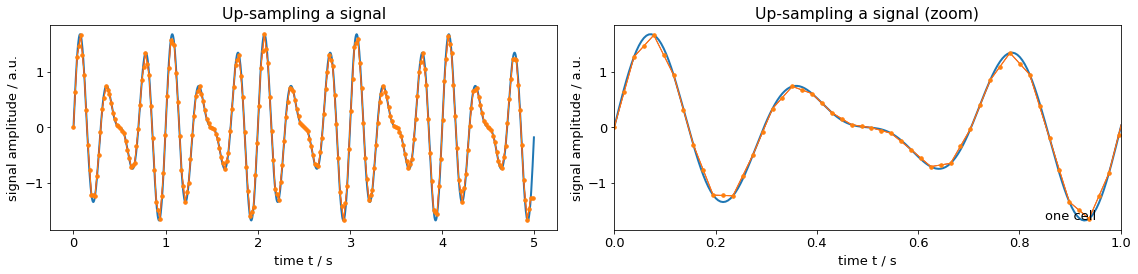

In [53]:
n_cols = 2
n_rows = 1
sz_h = 8
sz_v = 4

plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))
idx = 0

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(ptsTx, wave_x, 'C0-', ms = 5, lw = 2)
plt.plot(ptsT,  wave,   'C3-', ms = 5, lw = 1)
plt.plot(abscissae(newsig, offset = (newsig[0] * len(newsig[1])) / 2), newsig[1],   'C1.-', ms = 7, lw = 1)
plt.xlabel('time t / s')
plt.ylabel('signal amplitude / a.u.')
plt.title(r'Up-sampling a signal')
# plt.legend()
plt.tight_layout()

idx += 1
ax = plt.subplot(n_rows, n_cols, idx)
plt.plot(ptsTx, wave_x, 'C0-', ms = 5, lw = 2)
plt.plot(ptsT,  wave,   'C3-', ms = 5, lw = 1)
plt.plot(abscissae(newsig, offset = (newsig[0] * len(newsig[1])) / 2), newsig[1],   'C1.-', ms = 7, lw = 1)
plt.xlim(0,1)
plt.xlabel('time t / s')
plt.ylabel('signal amplitude / a.u.')
plt.title(r'Up-sampling a signal (zoom)')
plt.text(0.85, 0.05, 'one cell', transform = ax.transAxes)
# plt.legend()
plt.tight_layout()

# plt.savefig('PSR_Twiss.png')
plt.show()

#### Test scaling

#### Test the Fourier transform

#### Test Chirp Multiplication

In [ ]:
signalFT =  fourier_transform(input_signal)
signalTD =  fourier_transform(signalFT)

In [ ]:
signalTD

In [ ]:
dK, sigK = signalFT
# ptsF = abscissae(input_signal)
ptsF = np.fft.fftfreq(len(input_signal[1]), input_signal[0])
Npts = len(sigK)
Nov2 = Npts // 2 if Npts % 2 == 0 else (Npts - 1) // 2

# plot Fourier spectra
sz_h = 12
sz_v =  3
n_rows = 2
n_cols = 2
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))

ax = plt.subplot(n_rows, n_cols, 1)
plt.plot(ptsF[:Nov2], abs(sigK)[:Nov2], 'C0-', lw = 0.5)
# plt.xlim(0,50)
plt.ylabel('| FT(signal) |')
plt.title('Fourier spectra')

ax = plt.subplot(n_rows, n_cols, 2)
plt.semilogy(ptsF[:Nov2], abs(sigK)[:Nov2], 'C0-', lw = 0.5)
# plt.xlim(0,50)
plt.ylabel('| FT(signal) |')

ax = plt.subplot(n_rows, n_cols, 3)
plt.plot(ptsF[:Nov2], sigK.real[:Nov2], 'C3.-', ms = 2, lw = 0.5)
# plt.xlim(0,50)
plt.ylabel('FT(signal).real')

ax = plt.subplot(n_rows, n_cols, 4)
plt.plot(ptsF[:Nov2], sigK.imag[:Nov2], 'C2.-', ms = 2, lw = 0.5)
# plt.xlim(0,50)
plt.ylabel('FT(signal).imag')

plt.show()

In [ ]:
# plot our signal
plt.figure(figsize = (21, 7))
plt.plot(ptsTx, wave_x, 'C0-', ms = 5, lw = 2)
plt.plot(ptsT, -0.0078 * signalTD[1], 'C3-', ms = 5, lw = 1)
# plt.plot(ptsT, signalTD,   'C1.', ms = 7, lw = 1)
plt.show()

In [ ]:
# Python example: Fourier transform using numpy's FFT
# NB: Δν . dt = dν . Δt = 1
# and Ns = 1 + Δt / dt = 1 + Δν / dν

Npts = 1024
Nov2 = Npts // 2 if Npts % 2 == 0 else (Npts - 1) // 2

# begin / end time of our signal(s)
Tinit  =  0
Tfin   = 10
deltaT = Tfin - Tinit
 
# sampling parameters
dT = deltaT / Npts  # not deltaT / (Npts - 1) ?!?
deltaF = 1 / dT     # max detectable frequency is half this value
dF = 1 / deltaT

# points in time and frequency space
ptsT = np.arange(Npts) * dT
# ptsT = np.roll(np.fft.fftfreq(Npts, dF), Nov2) + deltaT / 2
ptsF = np.fft.fftfreq(Npts, dT)

# signal amplitudes and frequencies
amp1 = 1.00; signalF1 =  4
amp2 = 1.00; signalF2 =  7
amp3 = 0.50; signalF3 = 13
 
# create multiple sine waves, and add them
wave1 = amp1 * np.sin(2 * np.pi * signalF1 * ptsT)
wave2 = amp2 * np.sin(2 * np.pi * signalF2 * ptsT)
wave3 = amp3 * np.sin(2 * np.pi * signalF3 * ptsT)
wave  = wave1 + wave2 + wave3

# convert to frequency domain, and back
waveFT  =  np.fft.fft( wave,   norm = 'ortho')
waveTD  =  np.fft.ifft(waveFT, norm = 'ortho')
waveTDf = -np.fft.fft( waveFT, norm = 'ortho')

print('Npts             =', Npts)
print('Nov2             =', Nov2)
print('time range       =', deltaT)
print('frequency range  =', deltaF)
print('dT = 1 / deltaF  =', dT)
print('dF = 1 / deltaT  =', dF)
print('extreme F vals   =', ptsF[Nov2 - 1: Nov2 + 2])
print('extreme T vals   =', ptsT[-2:])

In [ ]:
dK, sigK = signalFT
ptsF = abscissae(signalFT)

# plot Fourier spectra
sz_h = 12
sz_v =  3
n_rows = 2
n_cols = 2
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))

ax = plt.subplot(n_rows, n_cols, 1)
plt.plot(ptsF[:], abs(sigK)[:], 'C0-', lw = 0.5)
plt.title('Fourier spectra')

ax = plt.subplot(n_rows, n_cols, 2)
plt.semilogy(ptsF[:], abs(sigK)[:], 'C0-', lw = 0.5)
# plt.xlim(0,50)

ax = plt.subplot(n_rows, n_cols, 3)
plt.plot(ptsF[:], sigK.real[:], 'C3.-', ms = 2, lw = 0.5)
# plt.xlim(0,50)

ax = plt.subplot(n_rows, n_cols, 4)
plt.plot(ptsF[:], sigK.imag[:], 'C2.-', ms = 2, lw = 0.5)
# plt.xlim(0,50)

plt.show()

In [ ]:
# plot time domain
plt.figure(figsize = (24, 8))

plt.plot(ptsT[:], wave,        'C0-', ms = 3, lw = 1)
plt.plot(ptsT[:], waveTD.real, 'C3.', ms = 3, lw = 1)
plt.xlim(6,10)
plt.show()

## Test Functions

In [ ]:
plt.figure(figsize = (8,2))
uvec = np.linspace(-4, 4, 201, endpoint = True)
fvec = [testFn1(u) for u in uvec]
re = [f.real for f in fvec]
im = [f.imag for f in fvec]
plt.plot(uvec, re, '-C0')
plt.plot(uvec, im, '-C1')
plt.show()

In [ ]:
plt.figure(figsize = (8,2))
uvec = np.linspace(-6, 6, 301, endpoint = True)
fvec = [testFn2(u) for u in uvec]
plt.plot(uvec, fvec, '-C0')
plt.show()

In [ ]:
plt.figure(figsize = (8,2))
uvec = np.linspace(-8, 8, 401, endpoint = True)
fvec = [testFn3(u) for u in uvec]
plt.plot(uvec, fvec, '-C0')
plt.show()

In [ ]:
plt.figure(figsize = (8,2))
uvec = np.linspace(-8, 8, 401, endpoint = True)
fvec = [testFn4(u) for u in uvec]
plt.plot(uvec, fvec, '-C0')
plt.show()

In [ ]:
plt.figure(figsize = (8,2))
uvec = np.linspace(-8, 8, 33, endpoint = True)
fvec = [testFn4(u) for u in uvec]
plt.plot(uvec, fvec, '-C0')
plt.show()

## Test Scaling

## Test Fourier Transform

## Test resampling

## Test Chirp Multiplication

In [ ]:
mx = convert_params_3to4(-3, -2, -1)
print(mx)
print(convert_params_4to3(mx),"\n")

mx = convert_params_3to4(-4/5, 1, 2)
print(mx)
print(convert_params_4to3(mx))

In [ ]:
convert_params_4to3([[0, 1], [-1, 0]])

## Experiment with the Fourier Transform

In [ ]:
np.fft.fftfreq?

In [ ]:
# Python example: Fourier transform using numpy's FFT
# NB: Δν . dt = dν . Δt = 1
# and Ns = 1 + Δt / dt = 1 + Δν / dν

Npts = 1024
Nov2 = Npts // 2 if Npts % 2 == 0 else (Npts - 1) // 2

# begin / end time of our signal(s)
Tinit  =  0
Tfin   = 10
deltaT = Tfin - Tinit
 
# sampling parameters
dT = deltaT / Npts  # not deltaT / (Npts - 1) ?!?
deltaF = 1 / dT     # max detectable frequency is half this value
dF = 1 / deltaT

# points in time and frequency space
ptsT = np.arange(Npts) * dT
# ptsT = np.roll(np.fft.fftfreq(Npts, dF), Nov2) + deltaT / 2
ptsF = np.fft.fftfreq(Npts, dT)

# signal amplitudes and frequencies
amp1 = 1.00; signalF1 =  4
amp2 = 1.00; signalF2 =  7
amp3 = 0.50; signalF3 = 13
 
# create multiple sine waves, and add them
wave1 = amp1 * np.sin(2 * np.pi * signalF1 * ptsT)
wave2 = amp2 * np.sin(2 * np.pi * signalF2 * ptsT)
wave3 = amp3 * np.sin(2 * np.pi * signalF3 * ptsT)
wave  = wave1 + wave2 + wave3

# convert to frequency domain, and back
waveFT  =  np.fft.fft( wave,   norm = 'ortho')
waveTD  =  np.fft.ifft(waveFT, norm = 'ortho')
waveTDf = -np.fft.fft( waveFT, norm = 'ortho')

print('Npts             =', Npts)
print('Nov2             =', Nov2)
print('time range       =', deltaT)
print('frequency range  =', deltaF)
print('dT = 1 / deltaF  =', dT)
print('dF = 1 / deltaT  =', dF)
print('extreme F vals   =', ptsF[Nov2 - 1: Nov2 + 2])
print('extreme T vals   =', ptsT[-2:])

In [ ]:
# plot Fourier spectra
sz_h = 12
sz_v =  3
n_rows = 2
n_cols = 2
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))

ax = plt.subplot(n_rows, n_cols, 1)
plt.plot(ptsF[:Nov2], abs(waveFT)[:Nov2], 'C0-', lw = 0.5)
plt.title('Fourier spectra')
# plt.title('Fourier spectrum of our signal')

ax = plt.subplot(n_rows, n_cols, 2)
plt.semilogy(ptsF[:Nov2], abs(np.fft.fft(wave))[:Nov2], 'C0-', lw = 0.5)
# plt.xlim(0,50)
# plt.title('Fourier spectrum of input signal')

ax = plt.subplot(n_rows, n_cols, 3)
plt.plot(ptsF[:Nov2], waveFT.real[:Nov2], 'C3.-', ms = 2, lw = 0.5)
# plt.xlim(0,50)
# plt.title('Fourier spectrum (real part)')

ax = plt.subplot(n_rows, n_cols, 4)
plt.plot(ptsF[:Nov2], waveFT.imag[:Nov2], 'C2.-', ms = 2, lw = 0.5)
# plt.xlim(0,50)
# plt.title('Fourier spectrum (imag part)')

plt.show()

In [ ]:
[ptsF[j] for j,f in enumerate(abs(waveFT)) if 1 < f]

In [ ]:
# plot time domain
plt.figure(figsize = (24, 8))

plt.plot(ptsT[:], wave,        'C0-', ms = 3, lw = 1)
plt.plot(ptsT[:], waveTD.real, 'C3.', ms = 3, lw = 1)
plt.xlim(6,10)
plt.show()

In [ ]:
# high-resolution signal
ptsTX = np.arange(Npts*8) * (dT / 8)
waveHR = (amp1 * np.sin(2 * np.pi * signalF1 * ptsTX)
         +amp2 * np.sin(2 * np.pi * signalF2 * ptsTX)
         +amp3 * np.sin(2 * np.pi * signalF3 * ptsTX))

# compare signal v. ifft(fft(signal))
plt.figure(figsize = (24, 8))
plt.plot(ptsTX, waveHR,      'C0-', ms = 3, lw = 1)
plt.plot(ptsT,  waveTD.real, 'C3.', ms = 3, lw = 1)
# plt.xlim(6,10)
plt.show()

# compare signal v. ifft(fft(signal))
plt.figure(figsize = (24, 8))
plt.plot(ptsTX, waveHR,      'C0-', ms = 3, lw = 1)
plt.plot(ptsT,  waveTD.real, 'C3.', ms = 3, lw = 1)
plt.xlim(-0.05, 3.05)
plt.show()

# compare signal v. ifft(fft(signal))
plt.figure(figsize = (12, 4))
# plt.plot(ptsTX, waveHR,      'C0-', ms = 3, lw = 1)
plt.plot(ptsT,  waveTD.real - wave, 'C0-', ms = 3, lw = 1)
plt.show()

In [ ]:
# create figures
sz_h = 12
sz_v =  3
n_rows = 2
n_cols = 2
plt.figure(figsize = (sz_h * n_cols, sz_v * n_rows))

# time-domain representation for wave 1
ax = plt.subplot(n_rows, n_cols, 1)
plt.plot(time, wave1)
plt.title('4 Hz sine wave')
plt.xlabel(r'$T$ / sec')
plt.ylabel('amplitude (arb.)')


# time-domain representation for wave 2
ax = plt.subplot(n_rows, n_cols, 2)
plt.plot(time, wave2)
plt.title('7 Hz sine wave')
plt.xlabel(r'$T$ / sec')
plt.ylabel('amplitude (arb.)')

# time-domain representation of the resultant wave
ax = plt.subplot(n_rows, n_cols, 3)
plt.plot(time, wave)
plt.title('multi-frequency wave')
plt.xlabel(r'$T$ / sec')
plt.ylabel('amplitude (arb.)')

# frequency-domain representation
ax = plt.subplot(n_rows, n_cols, 4)
plt.semilogy(frequencies, abs(fourierTransform))
plt.title('Fourier transform depicting the frequency components')
plt.xlabel(r'$\nu$ / Hz')
plt.ylabel('amplitude (arb.)')

plt.tight_layout()

plt.show()

In [ ]:
even_ceil(17.3)